<a href="https://colab.research.google.com/github/Alberto-Huerta/TAREA-2/blob/main/Tarea_2_parte_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Huerta Díaz Jair Alberto

Ecuaciones Diferenciales Parciales I

Ejercicio I

La solución de la ecuación 
$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}=0$$
sujeta a las condiciones de frontera:
b) $$u(0,y)=0, \;\; \frac{\partial u}{\partial x}|_{x=1}=10y, \;\;u(x,0)=u(x,1)=0$$
Esta dada en términos de la Serie de Fourier por la expresión:
$$u(x,y)=\frac{20}{\pi^2}\sum_{n=1}^{\infty} \frac{((-1)^{n+1}) sinh(n\pi x) sin(nπ y)}{(n^2cosh(n\pi))}$$

In [ ]:
from pylab import *
from matplotlib import animation,rc # biblioteca de animacion
from IPython.display import HTML # biblioteca para generar el video
%config InlineBackend.figure_format = 'retina'

Graficamos la condición incial $\frac{\partial u(1,y)}{\partial x}=10y$

In [ ]:
def f(y):
  x = zeros(len(y))
  for i in range(len(y)):
    x[i]=10*y[i]
  return x

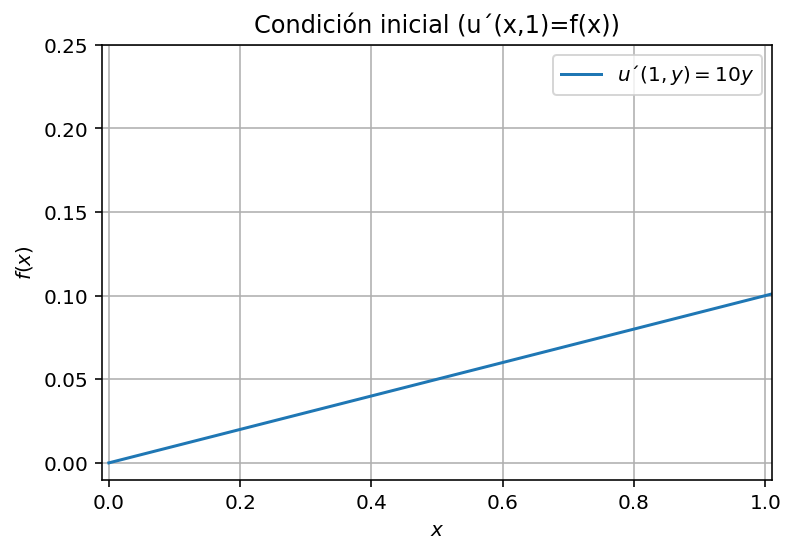

In [ ]:
y = linspace(0,1,1000)
x= f(y)
plot(x,y,label='$u´(1,y)=10y$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u´(x,1)=f(x))")
xlim([-0.01,1.01]),ylim([-0.01,0.25]),grid(),legend()
show()

Aplicamos una Serie de Fourier para aproximar la condición inicial $$\frac{\partial u(1,y)}{\partial x} = \Sigma_{n=1}^\infty C_5 n \pi cosh(n \pi (1)) sin(n \pi y) =10y$$
Lo anterior implica que:
$$C_5 n \pi cosh(n \pi)= b_n \; \; ⇒ \; \; C_5= \frac{b_n}{n \pi cosh(n \pi)}$$  
Donde 
$$b_n=2 \int _{0}^{1} 10y sin(n \pi y) dy$$
Entonces 
$$C_5= \frac{20 (-1)^{n+1}}{n^2 \pi^2 cosh(n \pi)}$$
Por lo tanto:
$$\Sigma_{n=1}^{\infty}\frac{20 (-1)^{n+1}sin(n \pi y)}{n \pi}=10y $$

In [ ]:
def u_0(y,N=20): # N es el número de armónicos
    f = zeros(len(y))
    for n in range(1,N):
        f += (((-1)**(n+1))*sin(n*pi*y))/n
    return (20.0/pi)*f

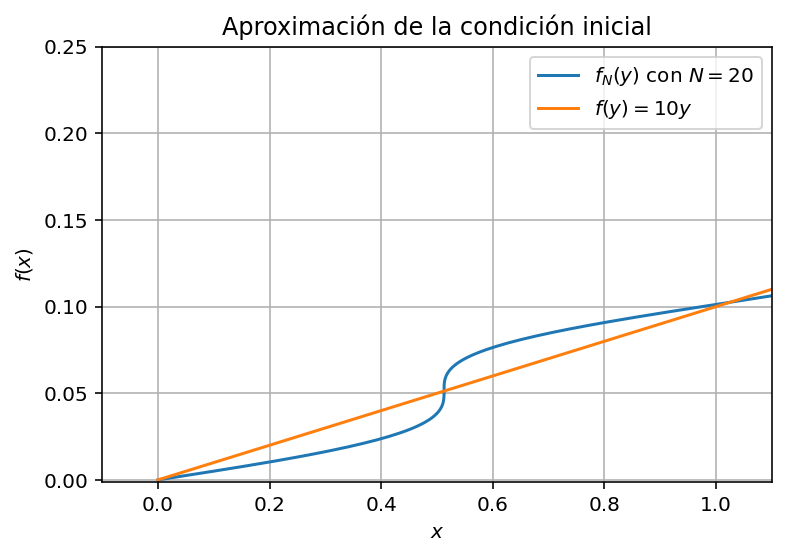

In [ ]:
f_n=u_0(y)
plot(f_n,y,label='$f_N(y)$ con $N=20$')
plot(x,y,label='$f(y)=10y$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.1,1.1]),ylim([-0.001,0.25]),grid(),legend()
plt.show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

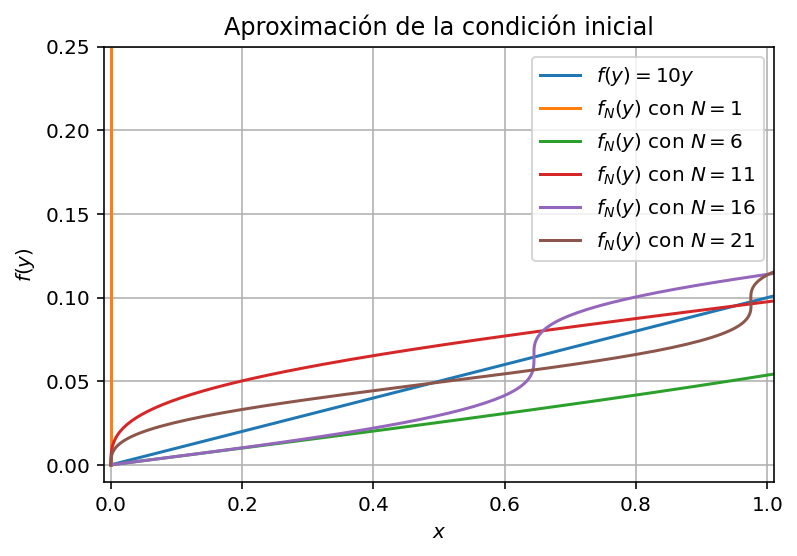

In [ ]:
plot(x,y,label='$f(y)=10y$')
for i in range(1,22,5):
    plot(u_0(y,i),y,label='$f_N(y)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(y)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,0.25]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $x=0$.

In [ ]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(x)):
        for n in range(1,N):
            f[:,i] += (((-1)**(n+1))*cosh(n*pi*x[i])*sin(n*pi*y))/((n)*cosh(n*pi))
    return (20.0/pi)*f

In [ ]:
x = linspace(0,10,1000)
t = linspace(0,1,1000)
U = u_x_t(x,t)

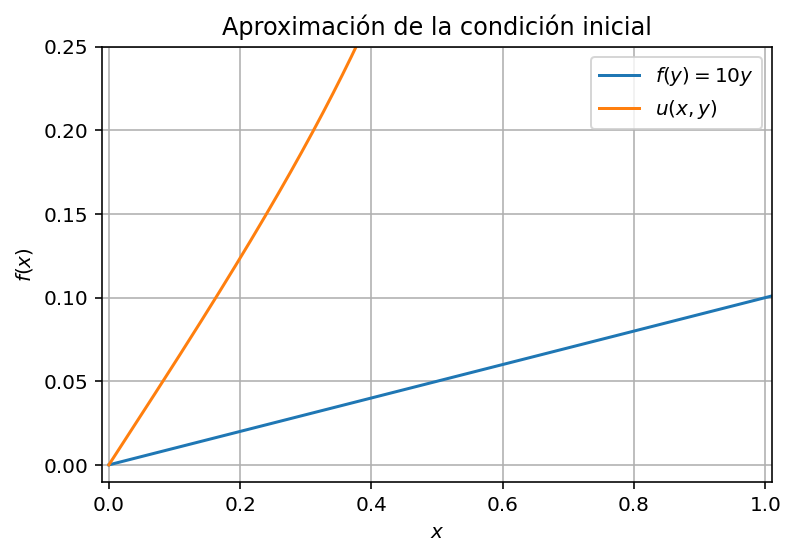

In [ ]:
plot(x,y,label='$f(y)=10y$')
plot(U[:,0],y,label='$u(x,y)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,0.25]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando  $x→∞$ .

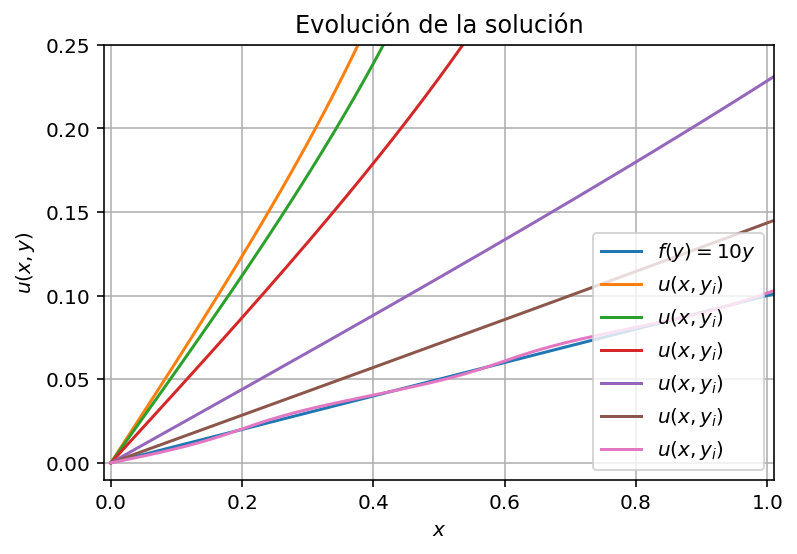

In [ ]:
plot(x,y,label='$f(y)=10y$')
plot(U[:,0],y,label='$u(x,y_i)$') # Mejorar
plot(U[:,15],y,label='$u(x,y_i)$')
plot(U[:,30],y,label='$u(x,y_i)$')
plot(U[:,60],y,label='$u(x,y_i)$')
plot(U[:,80],y,label='$u(x,y_i)$')
plot(U[:,99],y,label='$u(x,y_i)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,0.25]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

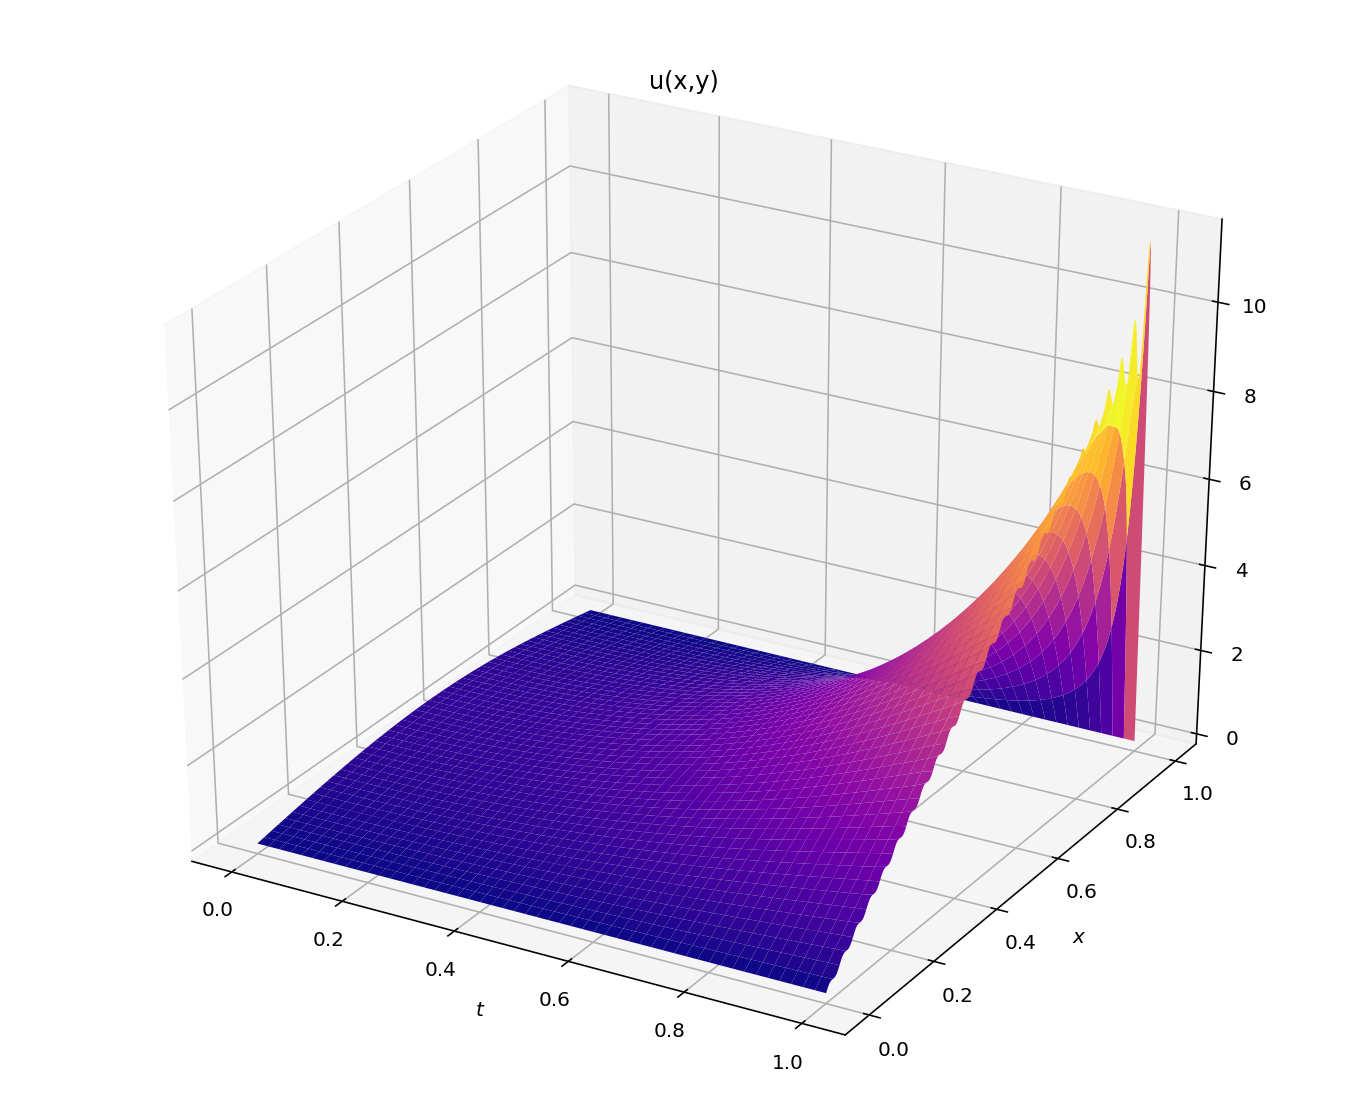

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,1000)
t = linspace(0,1.0,1000)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,y)")
ax.plot_surface(X, T, U, cmap="plasma"); #Otros colores:"viridis", "inferno", "plasma"